# ML Model Pipeline: Data Analysis

**Predicting House Sale Price**

The aim of the project is to develop a machine learning model to predict house sale prices using features that describe various aspects of a house.

**Goals**

- To be able to understand the features that affect the price of houses in the Market.
- To determine the significant features on which the house price depend on.
- To develop a model that predicts the price of a house using the selected/important factors.

**Data Source:**
- Ames Housing dataset 
    - This dataset originates from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    
**Credits:**
- www.kaggle.com - This project wouldnt have been possible without Ames dataset from www.kaggle.com



## Import Libraries

In [1]:
#libs for data processing
import pandas as pd
import numpy as np

#libs for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#Display matplotlib output inline
%matplotlib inline

#sizing plot/graph dimensions for matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#Display all the columns 
pd.pandas.set_option('display.max_columns',None)

#suppress warnings
import warnings
warnings.simplefilter(action='ignore')

## Read Data

In [2]:
try:
    df = pd.read_csv('houseprice.csv')
    print(f'[SUCCESS] Done loading the dataset...')
    
except:
    print(f'Unable to load the dataset!')
    

[SUCCESS] Done loading the dataset...


In [3]:
#shape of the df
print(f'The dataset has {df.shape[1]} variables with {df.shape[0]} observations(rows).')

The dataset has 81 variables with 1460 observations(rows).


## Exploratory Data Analysis(EDA)

The next important step is to explore and analyze the data i.e.,
 1. Visualize dataframe
 2. Explore summary statistics 
 3. Identify data types
 4. Identify missing values
 5. Identify numerical variables
   - i.Explore temporal variables
   - ii.Explore discrete variables
   - iii.Explore continuous variables
 6. Identify Outliers
 7. Identify categorical variables
 8. Analyze cardinality of categorical variables

    

#### [1] Visualize the Dataframe

In [4]:
#Top x rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- The dataset comprises of 1460 observations and 81 features.
- SalePrice is the dependent variable and the other 80 features are the independent variabes.
- The dataset contains four Temporal variables that include 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', and 'YrSold'. These variables will be explored further in the Temporal variables section of this notebook.

#### [2] Summary statitistics

In [5]:
#summary statistics for numeric variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There is a significant difference between the 75th percentile and max values for some of the variables. The difference is indicative of outliers.

#### [3] Analyze Data Types

##### Columns and their corresponding data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The dataset comprises integer, float, and object data types.
- A number of variables have missing values. This will be explored further in the next step.


#### [4] Identify & Analyze Missing values
   What are the features that contain missing values?

##### Missing values visualization using seaborn

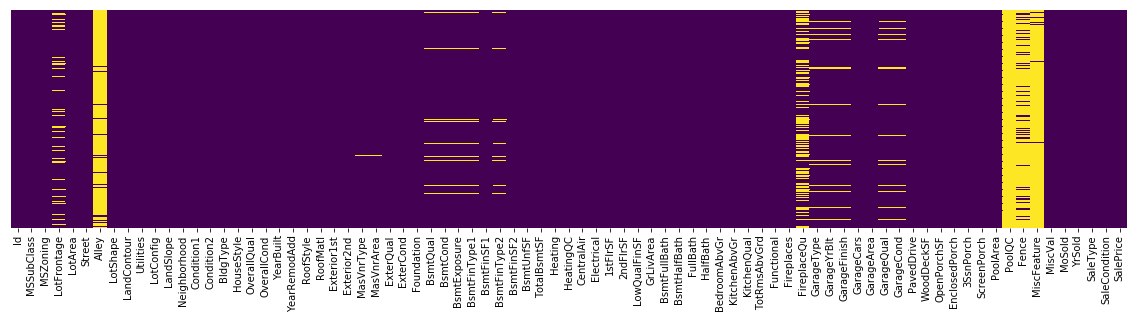

In [7]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

PoolQC, MiscFeature,Alley, Fence, FireplaceQu, and LotFrontage have a significant number of missing values. 

In [8]:
df = df.copy()

lst = df.columns
dfCount = pd.DataFrame()#initialize empty df
for var in lst:
    k = sum(pd.isnull(df[var]))
    perc = round(((sum(pd.isnull(df[var]))/len(df))*100),2)
    
    #print columns with missing values including their corresponding 'sum of the missing values' & 'percent of the missing values
    if perc > 0:
        print('|',var, ':',k, '|',perc,'% of data is missing |')
        dfCount = dfCount.append([var])#append column with missing value to the empty df above(dfCount df)
    else:
        pass
#print('dfCount',dfCount)

#compute percentage of variables with missing values
percColsMissing = round((len(dfCount)/len(df)),2)
print('\n')
print(f'{percColsMissing} % of the variables have atleast 1 missing value.')
print(f'{len(dfCount)} out of {len(df)} variables have missing values.')

| LotFrontage : 259 | 17.74 % of data is missing |
| Alley : 1369 | 93.77 % of data is missing |
| MasVnrType : 8 | 0.55 % of data is missing |
| MasVnrArea : 8 | 0.55 % of data is missing |
| BsmtQual : 37 | 2.53 % of data is missing |
| BsmtCond : 37 | 2.53 % of data is missing |
| BsmtExposure : 38 | 2.6 % of data is missing |
| BsmtFinType1 : 37 | 2.53 % of data is missing |
| BsmtFinType2 : 38 | 2.6 % of data is missing |
| Electrical : 1 | 0.07 % of data is missing |
| FireplaceQu : 690 | 47.26 % of data is missing |
| GarageType : 81 | 5.55 % of data is missing |
| GarageYrBlt : 81 | 5.55 % of data is missing |
| GarageFinish : 81 | 5.55 % of data is missing |
| GarageQual : 81 | 5.55 % of data is missing |
| GarageCond : 81 | 5.55 % of data is missing |
| PoolQC : 1453 | 99.52 % of data is missing |
| Fence : 1179 | 80.75 % of data is missing |
| MiscFeature : 1406 | 96.3 % of data is missing |


0.01 % of the variables have atleast 1 missing value.
19 out of 1460 variables hav

The dataset contains variables with missing values. We need to address this during the Feature Engineering process, i.e., by imputation, drop the affected variables, etc.

##### Explore the realtionship between variables-with-missing values and the dependent variable(SalePrice). 
   -Let's compare how the SalePrice is affected by variables-with-missing values vs. variables with all the values.

In [9]:
def analyze_missing_value(df, var):
    df = df.copy()
    #create a feature that indicate a '1' if data is missing and a '0' if not.
    df[var] = np.where(df[var].isnull(),1,0)
    #compare the mean or the median  SalePrice where data is missing vs where data is available.
    df.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.show()

##### plot the output of analyze_missing_value i.e., for each variable

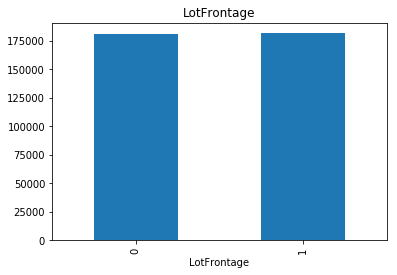

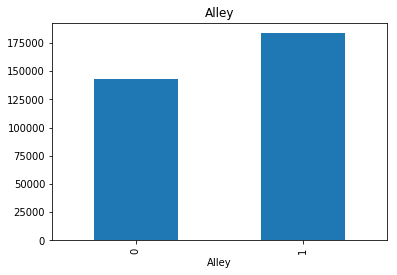

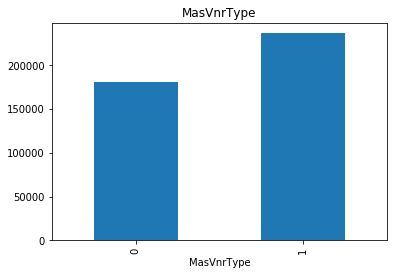

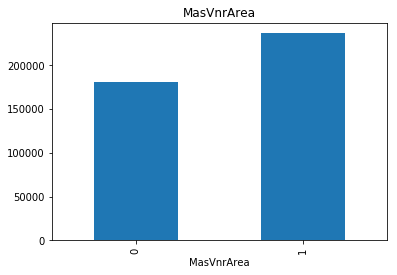

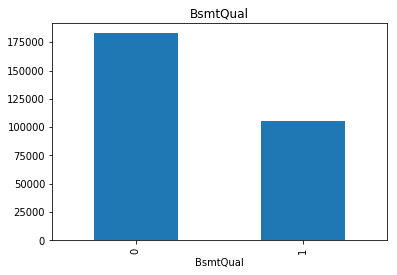

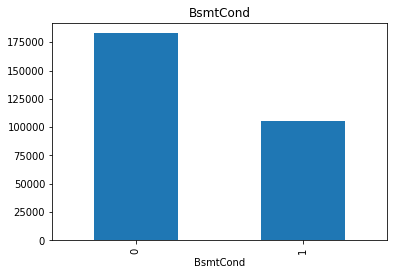

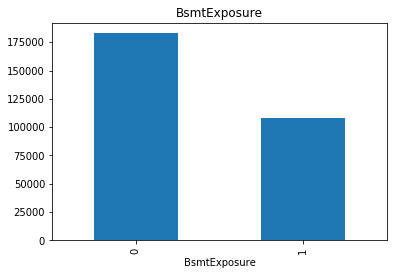

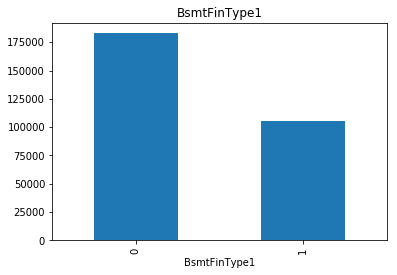

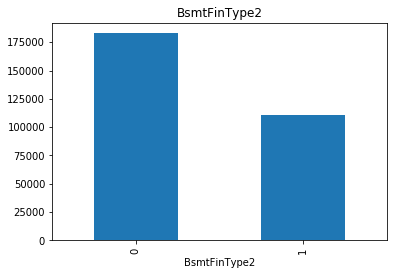

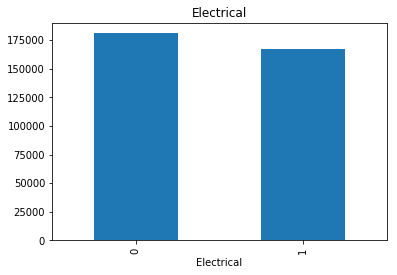

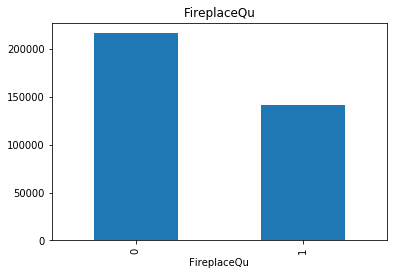

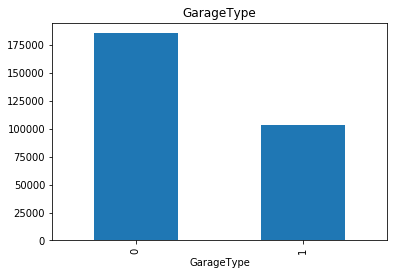

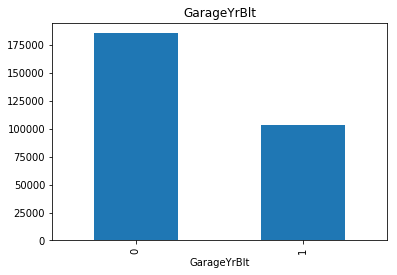

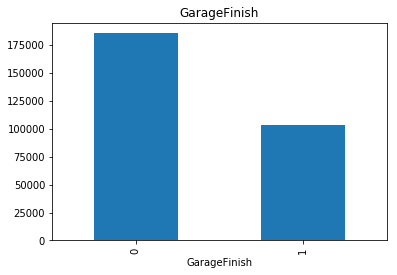

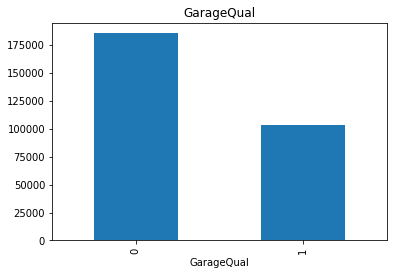

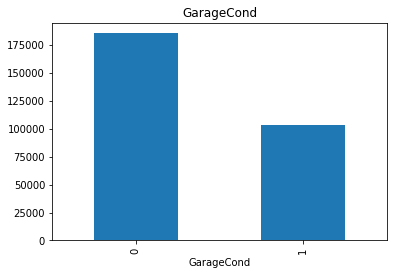

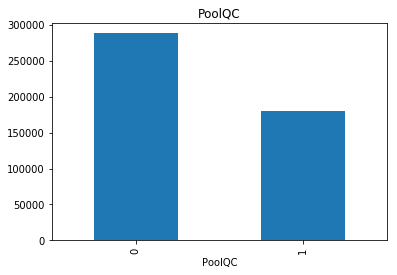

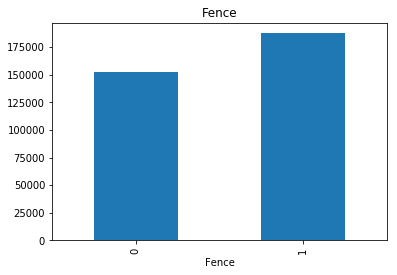

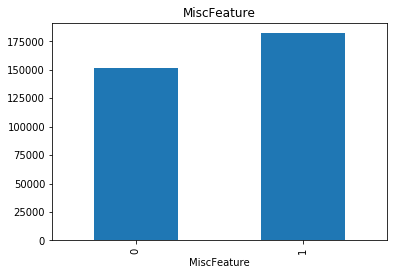

In [10]:
#create a list of the variables with missing values
vars_with_missingValues = [var for var in df.columns if df[var].isnull().sum() > 0]

#plot by calling the analyze_missing_value function for each variable
for var in vars_with_missingValues:
    analyze_missing_value(df, var)

As per above plot, the average SalePrice varies between variable-with-missing data and the ones with all the data.

#### [5] Identify & Analyze Numerical variables

What are the numerical variables in the dataset?

In [11]:
#create a list of numeric variables
numeric_var = [var for var in df.columns if df[var].dtypes != 'object']
print(numeric_var)
print('\n')
print(f'The number of numerical variables in the dataset is {len(numeric_var)}')

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


The number of numerical variables in the dataset is 38


In [12]:
#show x rows of var_numeric table
df[numeric_var].head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


The above table contains the 'Id' variable, which is a unique identifier for each row/observation. We need to figure out how many unique observations are in 'df[Id]' column and compare the result with the length of the entire dataset.

In [13]:
uniqueIds = df['Id'].nunique()
print(f'Id columns has {uniqueIds} unique Ids.')

print(f'The length of the dataset is {len(df)}.')

Id columns has 1460 unique Ids.
The length of the dataset is 1460.


The total number of unique Ids match the length of the df. We can, therefore, drop the Id column and not include it in our predictions.

#### [5.i] Explore Temporal variables

As highlighted above, Temporal variables of interest are YearBuilt', 'YearRemodAdd', 'GarageYrBlt', and 'YrSold'. We'll extract the information that is useful for the model building from these variables. For example, we'll add the difference between the year the house was build and the year it was sold to our dataframe, i.e., as a 'dummy' variable.

In [14]:
#create a list containing year information. 
yr_vars = [var for var in numeric_var if 'Yr' in var or 'Year' in var]
yr_vars


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [15]:
#Explore yr_vars above
for var in yr_vars:
    print(var, df[var].unique())
    print(f'{var} has a total {df[var].nunique()} unique years.')
    print('\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearBuilt has a total 112 unique years.


YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
YearRemodAdd has a total 61 unique years.


GarageYrBlt

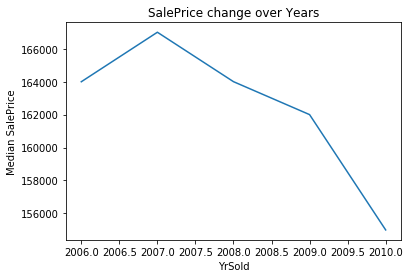

In [16]:
#Explore how SalePrice changed over time/years
SalePrice_change = df.groupby('YrSold')['SalePrice'].median()
#SalePrice_change
#plot
plt.plot(SalePrice_change)
plt.xlabel('YrSold')
plt.ylabel('Median SalePrice')
plt.title('SalePrice change over Years')
plt.show()

The SalePrice decreased over time. This is not typical, and we’ll conduct further investigations.


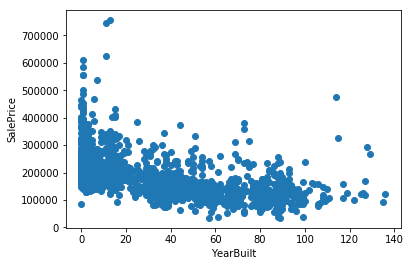

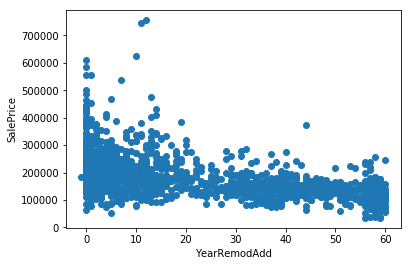

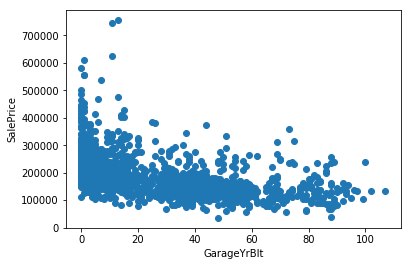

In [17]:
#Explore the relationship between the difference between the YrSold and other year variables
def analyze_yr_vars(df, var):
    df = df.copy()
    #compute the difference btn YrSold and other year-variables
    df[var] = df['YrSold'] - df[var]
    plt.scatter(df[var], df['SalePrice'])
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in yr_vars:
    if var != 'YrSold':
        analyze_yr_vars(df,var)

As shown in the above plots, there is a negative relationship between SalePrice and year-variables(YearBuilt, YearRemodAdd, and GarageYrBlt). The SalePrice is negatively affected by the "older features" of the house.

#### [5.ii] Explore Discrete variables
   - A discrete variable is defined as a feature with a countable/finite number of values.
   - Also, for this analysis, a function is considered to be a discrete variable if the total number of unique values is less than 20.


In [18]:
discrete_vars = [var for var in numeric_var if len(df[var].unique()) < 20 and var not in yr_vars+['Id']]
print(f'Discrete variables : {discrete_vars}')
print('\n')
print(f'The total number of discrete variables is {len(discrete_vars)}.')

Discrete variables : ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold']


The total number of discrete variables is 14.


In [19]:
#show x rows of var_numeric table
df[discrete_vars].head(3)

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9


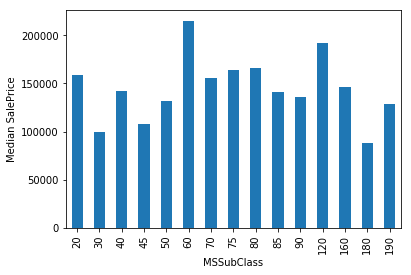

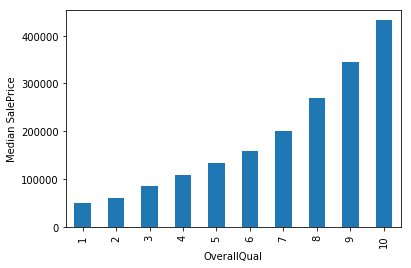

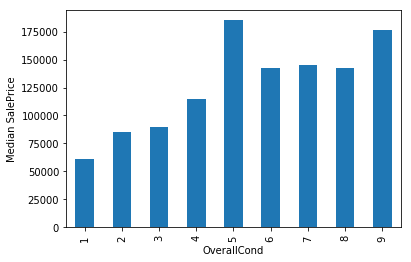

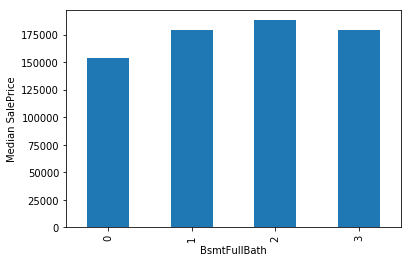

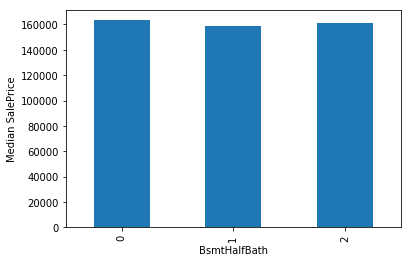

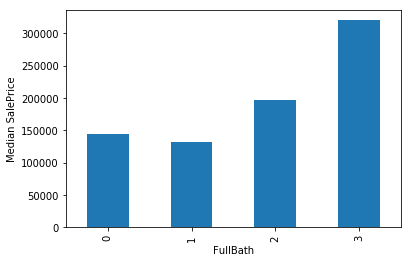

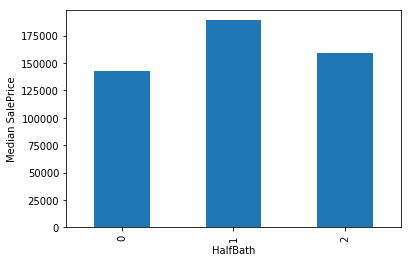

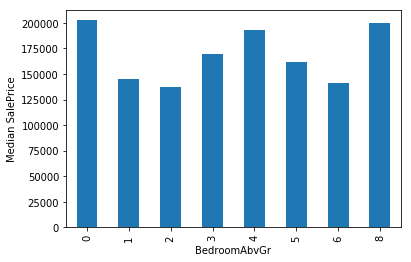

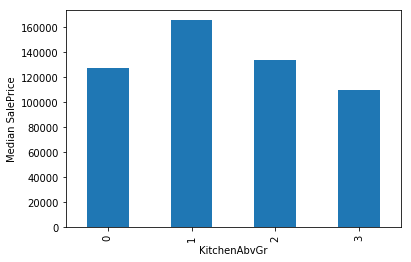

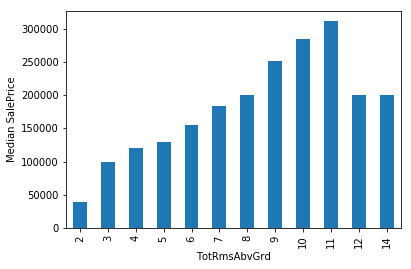

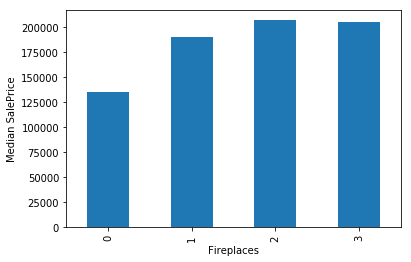

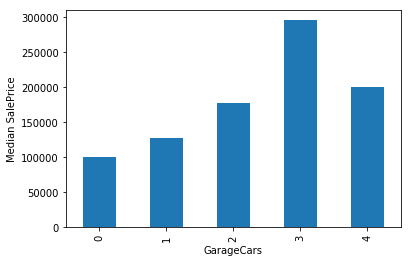

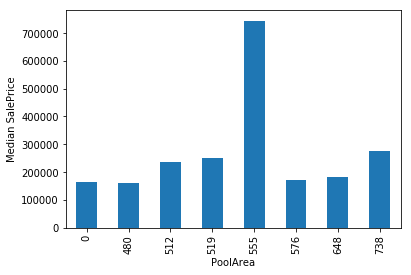

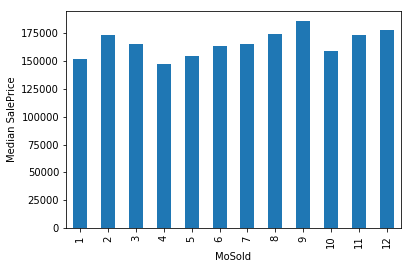

In [20]:
#Explore the relationship between SalePrice and discrete variables
def analyze_discrete_vars(df, var):
    df = df.copy()
    discrete_plot = df.groupby(var)['SalePrice'].median()
    discrete_plot.plot.bar()
    plt.xlabel(var)
    plt.ylabel('Median SalePrice')
    plt.show()
    
for var in discrete_vars:
    analyze_discrete_vars(df,var)

#### [5.iii] Explore Continuous variables
   - Continuous variables are defined as the numeric variables that are not Temporal or Discrete variables.

In [21]:
continuous_vars = [var for var in numeric_var if var not in yr_vars + discrete_vars + ['Id']]
print(f'Continuous variables : {continuous_vars}')
print('\n')
print(f'The total number of continuous variables is {len(continuous_vars)}')

Continuous variables : ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


The total number of continuous variables is 19


In [22]:
#show x rows of Continuous variables table
df[continuous_vars].head(3)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500


###### Analyze the distributions of continuous variables

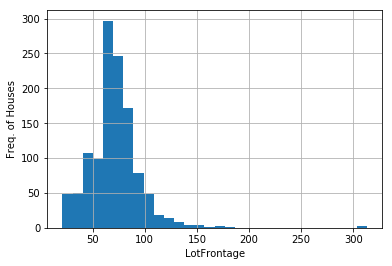

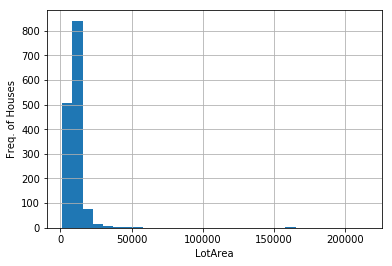

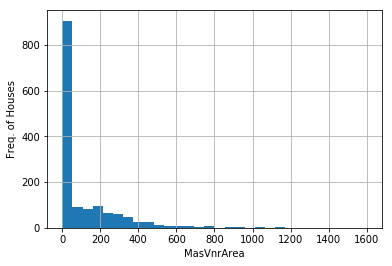

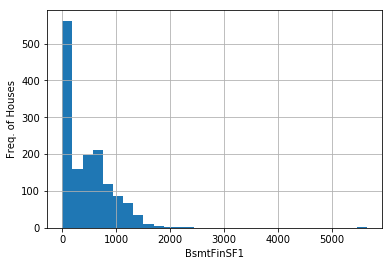

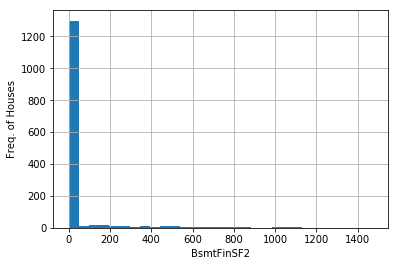

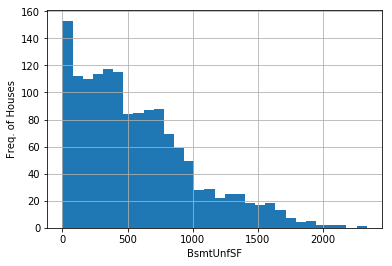

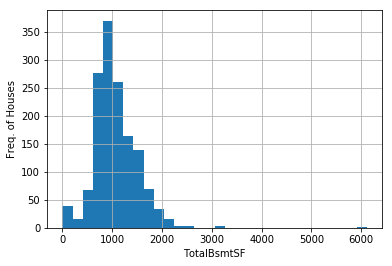

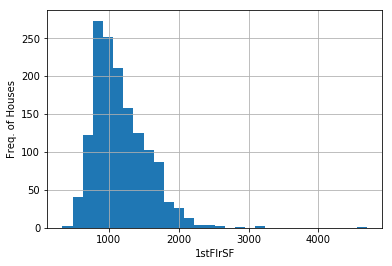

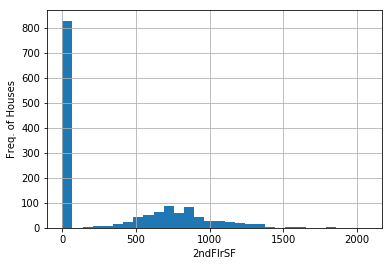

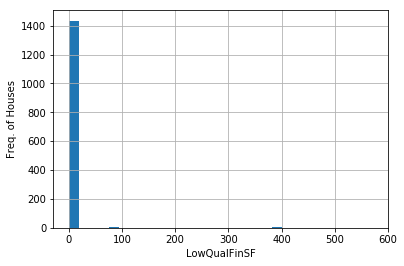

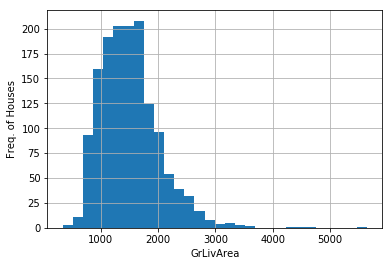

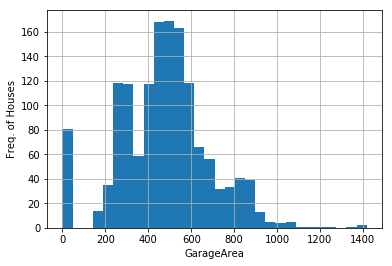

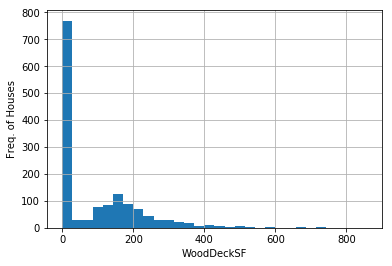

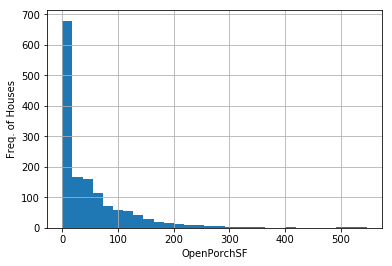

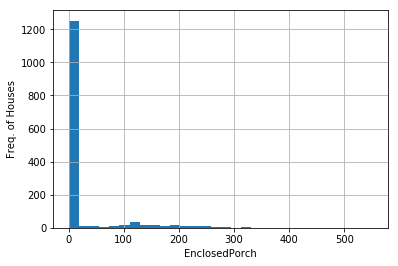

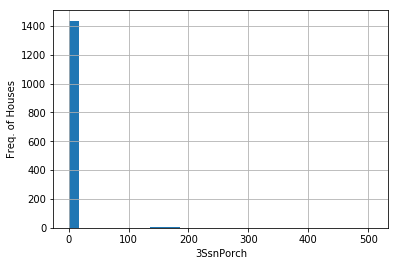

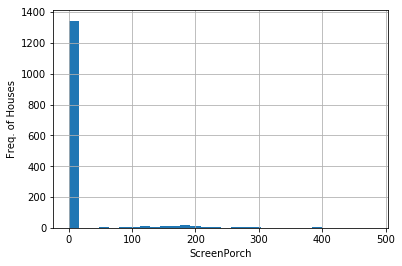

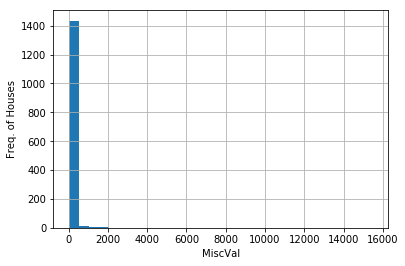

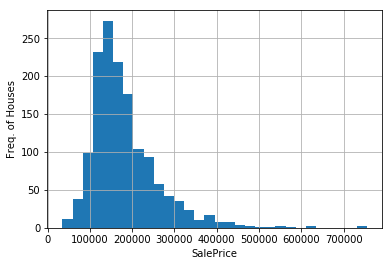

In [23]:
def analyze_continuous_dist(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.xlabel(var)
    plt.ylabel('Freq. of Houses')
    plt.show()
    
for var in continuous_vars:
    analyze_continuous_dist(df,var)

The variables are not normally distributed. We'll use transformation to reduce the skewness by taking the logarithm of the variables. (This transformation will be included in the feature engineering phase.) 

Let's go ahead and transform continuous variables using the logarithmic transformation method. Note: Log logarithmic transformation CANNOT be applied to ZERO or NEGATIVE values. We, therefore, need to check if we have Zero or negative values in continuous variables before applying log transformation.


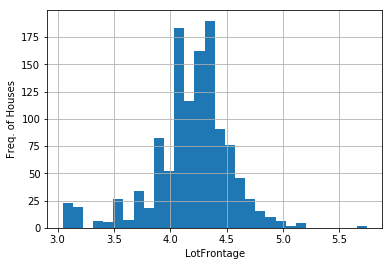

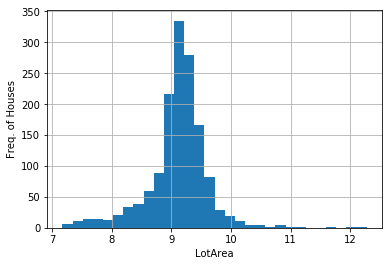

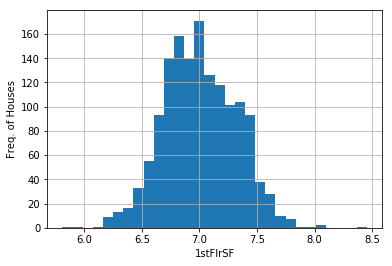

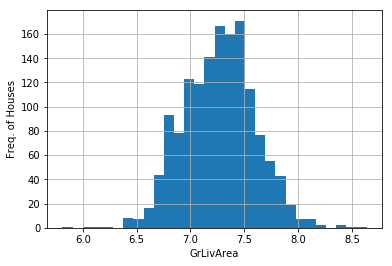

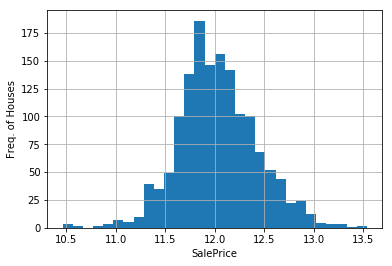

In [24]:
def log_transform_conti_vars(df, var):
    df = df.copy()
    #NOTE: log doesnt take 0 or -ve values
    if any(df[var] <= 0):
        pass
    else:
        #logarithmic transformation
        df[var] = np.log(df[var])
        #plot
        df[var].hist(bins=30)
        plt.xlabel(var)
        plt.ylabel('Freq. of Houses')
        plt.show()     

for var in continuous_vars:
            log_transform_conti_vars(df, var)

We now have normal distributions of continuous variables after performing log transformation.

##### Explore the relationship between SalePrice and the log-transformed variables

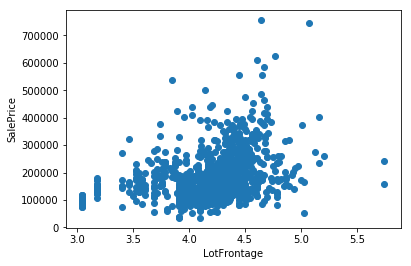

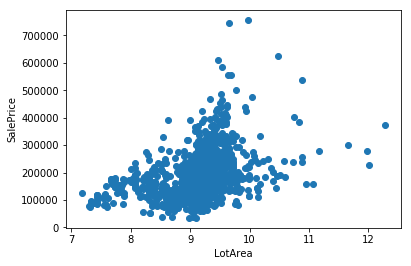

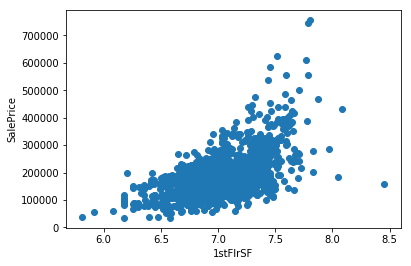

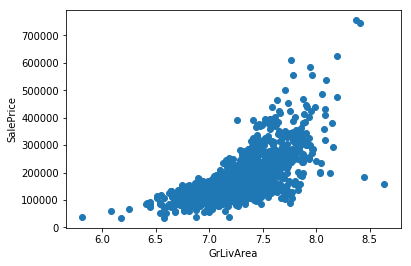

In [25]:
def log_transform_compare_vars(df, var):
    df = df.copy()
    
    #NOTE: log doesnt take 0 or -ve values
    if any(df[var] <= 0):
        pass
    else:
        #logarithmic transformation
        df[var] = np.log(df[var])
        
         #plot
        plt.scatter(df[var], df['SalePrice'])
        plt.xlabel(var)
        plt.ylabel('SalePrice')
        plt.show()     

for var in continuous_vars:
    if var != 'SalePrice':
        log_transform_compare_vars(df, var)
    

There is a positive correlation between SalePrice and log-transformed continuous variables.

#### [7] Identify and Analyze Outliers
 - The presence of outliers can often skew the results that take into consideration these data points(i.e., outlier data points).
 - For the next step, we'll explore the outliers in log-transformed continuous variables only.

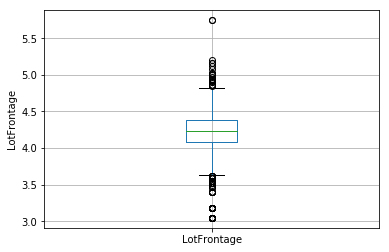

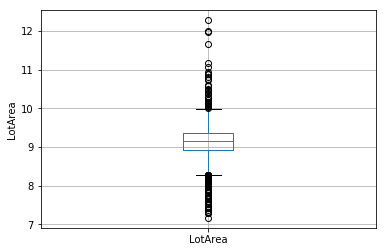

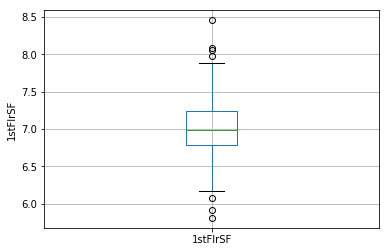

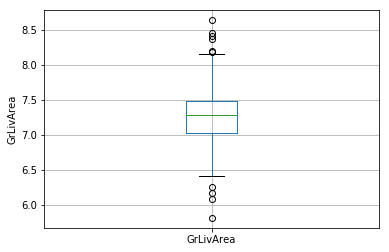

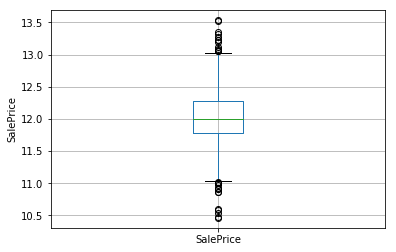

In [26]:
def check_outliers(df, var):
    df = df.copy()
    
    #NOTE: log doesnt take 0 or -ve values
    if any(df[var] <= 0):
        pass
    else:
        #logarithmic transformation
        df[var] = np.log(df[var])
        #plot
        df.boxplot(column=var)
        plt.ylabel(var)
        plt.show()
    
for var in continuous_vars:
    check_outliers(df, var)

The log-transformed continuous variables have outliers. It's, therefore, important to revisit them and figure out how to deal with them, especially if we want to optimize model performance. Common techniques for dealing with outliers include:
- Deleting the observation
- Imputation
- Treating outliers separately as a group/class of its own.
- Transforming variables


#### [8] Identify and Analyze Categorical variables

In [27]:
#Create a list containing categorical variables
categorical_vars = [var for var in df.columns if df[var].dtype == 'object']
print(f'Categorical variables : {categorical_vars}')
print('\n')
print(f'The total number of Categorical variables is {len(categorical_vars)}.')

Categorical variables : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


The total number of Categorical variables is 43.


In [28]:
#show x rows of categorical varibles table
df[categorical_vars].head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### [9] Analyze Cardinality of categorical variables
   - Most algorithms cannot handle Categorical variables with high cardinality(i.e., too many unique values). 

##### Find out how many different categories are in each category variable.

In [29]:
df[categorical_vars].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

Categorical variables show low cardinality, i.e., they have few unique values.